# Predictions Loans

Author: Necky Tran <br>
Date: 31/01/24

### Table of Contents

1. [Introduction](#Introduction)
2. [Wrangling](#Wrangling)
3. [Statistical Analysis](#Statistical_Analysis)
4. [Linear Regression](#Linear)
5. [Summary](#Summary)

# Introduction
This notebook contains a Loan Classification Dataset. The dataset is sourced from Kaggle:
- 'https://www.kaggle.com/datasets/abhishek14398/loan-dataset/data'
-  the purpose is to quickly train classification models and compare 



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
loan_df = pd.read_csv('loan_data.csv')
# view first rows
loan_df.head()

C:\Users\trann\AppData\Local\Temp\ipykernel_20300\1077288624.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan_data.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
# Check Shape, Info(Number of Rows and Columns) and datatype of loan data

print("Shape of the data frame :",loan_df.shape)
print("===================================================")
print(loan_df.info())

Shape of the data frame : (39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


Rows: 39717 <br>
Columns : 111

From the first look into the data, it looks like some columns are filled with NaN values. Locate them and remove

In [23]:
# Create a boolean mask of NaN values, True = NaN
nan_mask = loan_df.isna()

# Check if all values in each column are True (i.e., all NaN)
columns_with_only_nan = nan_mask.all()

# Extract column names with only NaN values
empty = columns_with_only_nan[columns_with_only_nan].index

print("Columns with only NaN values:", list(empty))

print("# of Columns with only NaN values:", len(empty))

Columns with only NaN values: ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_

In [25]:
# drop empty columns
loan_df = loan_df.drop(columns = empty)

In [28]:
# check new shape
loan_df.shape

(39717, 57)

In [34]:
# sum missing data and sort
loan_df.isna().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

Drop columns with null values

In [53]:
# Find columns with missing data
columns_with_missing_data = loan_df.columns[loan_df.isna().any()].tolist()

# Drop columns with missing data from the original DataFrame
loan_df = loan_df.drop(columns=columns_with_missing_data)

In [55]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

Loan Status is our target variable
- it predicts if a person has fully paid off their loan or defaulted ('charged off')

In [57]:
# check distribution of loan status
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Remove Rows that are current customers, and remove other features that we do not think will be imporant (ex. policy_code)

In [58]:
loan_df = loan_df[loan_df.loan_status != "Current"]

In [59]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [61]:
loan_df['loan_status'].value_counts()*100/len(loan_df)

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

Find Columns to remove that will not help with predictions: <br>
id, member_id, url, zip_code, addr_state, issue_d, initial_list_status, policy_code, acc_now_delinq, delinq_amnt, out_prncp, out_prncp_inv

In [71]:
columns_to_drop = ['id', 'member_id', 'url', 'zip_code', 'addr_state', 'issue_d', 'initial_list_status', 'policy_code', 'acc_now_delinq', 'delinq_amnt', 'out_prncp', 'out_prncp_inv']

In [73]:
loan_df = loan_df.drop(columns=columns_to_drop)

In [89]:
loan_df.shape

(38577, 31)

Now remove columns that are multi-collinear

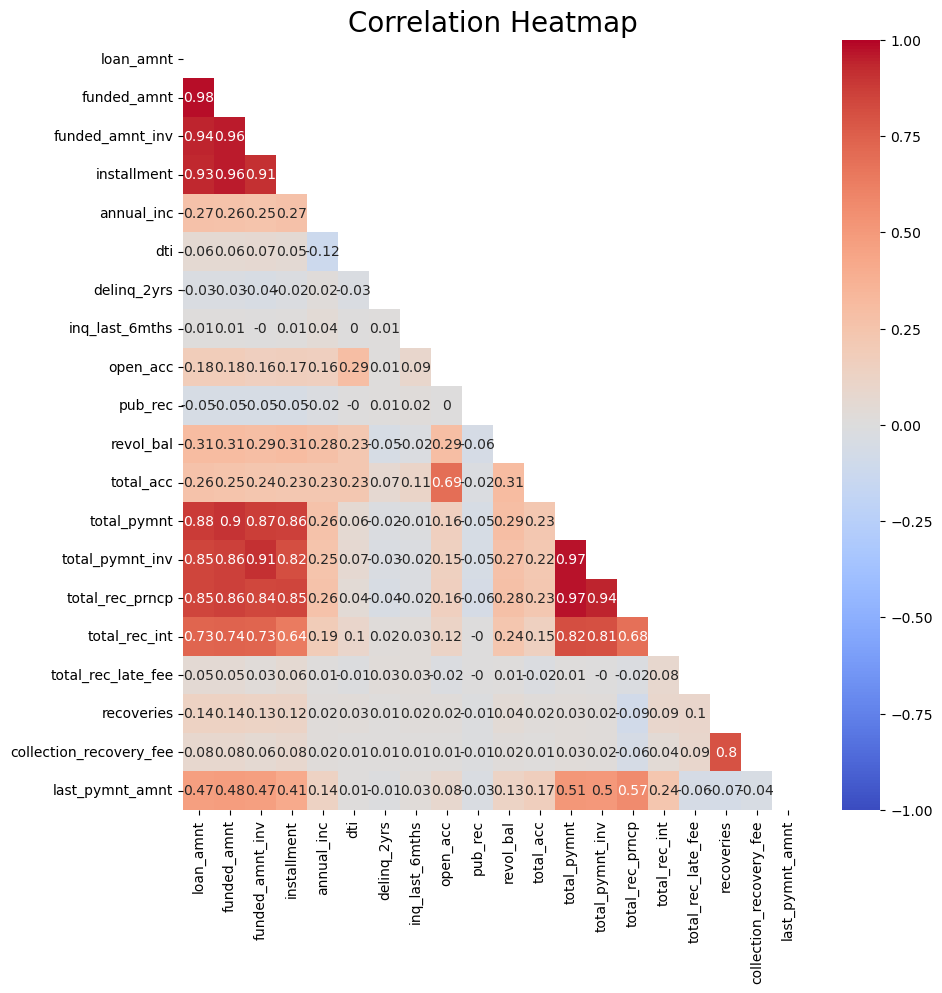

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_df.corr().round(2), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = np.triu(loan_df.corr()) )
plt.title('Correlation Heatmap', size = 20)
plt.show()

Remove multicollinear variables
- funded_amnt, funded_amnt_inv, installment, total_pymnt, total_pyment_inv, total_rec_prncp, total_rec_int